In [29]:
#imports

import numpy as np
import pandas as pd
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import pairwise_distances
from nltk.stem import WordNetLemmatizer, PorterStemmer

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import seaborn as sns

# Notebook for Recommendation Engine
Using the hyperperameters found in the last notebook, I will use this notebook to fine-tune a recommendation engine

In [2]:
df = pd.read_csv('data/finaldf.csv').dropna()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10178 entries, 0 to 10179
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    10178 non-null  object
 1   genre    10178 non-null  object
 2   appid    10178 non-null  int64 
 3   reviews  10178 non-null  object
dtypes: int64(1), object(3)
memory usage: 397.6+ KB


In [280]:
df.loc[100]['reviews']

'Just a few years ago all the cheater\'s capabilities was spawning UFOs, changing weather, caging every player in session and other "non-harmful" annoying stuff. But today I\'ve met cheater chasing me across [u]private[/u] sessions and even solo heist.\nIt\'s getting worse and worse with cheaters situation in GTA Online and Rockstar did nothing useful to fix it. There\'s known information about cheaters extracting your IP via game for DDoS attacks and even finding your location.\nThis shit is not fun anymore, it\'s straight up terrifying and dangerous.\n[i]GTA Online has to be abandoned and never be played again.[/i] I personally don\'t want to launch it ever again.\n\nOh, the Story Mode (singleplayer) of this game is cool. Worth buying\n\n\n\n*Review update*\n\nI think I should mention few thing:\nYes, Online is fun and interesting\nYes, it\'s very unlikely that you meet a cheater chasing you, extracting your location, overheating your computer or blaming you in cheating which will le

In [4]:
#creating reviews list

reviews_list = []
for items in list(df.reviews):
    reviews_list.append(items)
len(reviews_list)

10178

In [61]:
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()
def preprocessor(doc):
    #doc = stemmer.stem(doc)
    return lemmatizer.lemmatize(doc).lower()



stop_words = text.ENGLISH_STOP_WORDS.union(['good', 'great','game','video','play','playing','played',
                                            'best','really','pretty', 'like','nice','better','cool',
                                            'just', 'favorite', 'game', 'life', 'recommend', 'games',
                                           'steam', 'hour', 'hours'])


vectorizer = TfidfVectorizer(stop_words=stop_words, token_pattern='[a-zA-Z]{4,}',
                             preprocessor = preprocessor, min_df = 3, ngram_range=(1,3))
model = NMF(11)




In [160]:
doc_word = vectorizer.fit_transform(reviews_list)
doc_topic = model.fit_transform(doc_word)

/Users/michaelharnett/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


In [232]:
topics = ['Gameplay Functionality', 'Emotional Response', 'Multiplayer', 'Graphics and Enviroment',
          'Catch-All/Generally Awesome', 'Time Filler', 'Characters and Plot', 'Masterpiece/Breathtaking',
         'Learning Curve', 'Nonsense', 'Challenging']


topic_lists = [[]] * 11
top_lists = [[]] * 11
def topic_words(docs):    
    words = vectorizer.get_feature_names()
    for idx, topic in enumerate(model.components_):
        topic_lists[idx] = [words[x] for x in topic.argsort()]
        top_lists[idx] = [words[y] for y in topic.argsort()[:-50-1:-1]]
        top_words = [words[i] for i in topic.argsort()[:-50-1:-1]]
        #topic_lists[idx].extend(top_words)
        print(f"{Topics[idx]}:\n", ", ".join(top_words), "\n")
        



In [270]:
for i in range(len(topic_lists)):
    topic_lists[i] =' '.join(topic_lists[i])
    top_lists[i] = ' '.join(top_lists[i])

In [178]:
len(topic_lists)

11

In [132]:
#topic_lists # to make topic word clouds

In [234]:
topic_words(vectorizer)

Gameplay Functionality:
 want, people, make, need, feel, know, world, experience, think, players, things, years, mods, makes, enjoy, player, community, different, content, free, little, actually, real, times, going, thing, work, right, does, racing, feels, character, doesn, looking, level, half, gameplay, start, combat, stuff, quite, review, come, multiplayer, devs, getting, cars, overall, look, sure 

Emotional Response:
 love, love love, fucking, hate, absolutely love, worst, absolutely, love story, amazing love, music, balls, childhood, remastered, forever, love wait, love graphics, love hate, graphics, anymore, time love, friend, challenge, review, wanna, gonna, mmorpg, brings, love challenge, poggers, excellent, creative, wish, gold, making, real, quality, dinosaurs, late, monkeys, edition, destruction, heists, fell love, love dinosaurs, tell love, love monkeys, broke, fantastic, zombies, come 

Multiplayer:
 friends, classic, solo, family, maps, poggers, challenging, highly, kill

In [268]:
def test_query(query):
    '''
    This will take a query, and print the 5 most closely related games to the query, based on the
    pairwise distance to review data. Query MUST be entered as a list.
    '''
    query = list(query)
    query_vec = vectorizer.transform(query)
    query_topic = model.transform(query_vec)

    common = list(pairwise_distances(query_topic, doc_topic, metric = 'cosine').argsort()[0][:5])
    for items in common:
        print(df.iloc[items]['title'])

SyntaxError: invalid syntax (<ipython-input-268-ebd02257cc77>, line 1)

In [285]:
test_query(['cool characters'])


Summer Pockets
The Witcher: Enhanced Edition Director's Cut
To the Moon
BioShock Infinite
To the Moon


In [265]:
test_query(['tedius and annoying'])

Darkest Dungeon®
Celeste
Age of Empires II: Definitive Edition
Game Dev Tycoon
Crusader Kings III


In [267]:
test_query(['beautiful and fun'])

Ori and the Blind Forest
Tomb Raider
Disco Elysium - The Final Cut
Outer Wilds
The Witcher® 3: Wild Hunt


In [287]:
test_query(['relaxing'])

American Truck Simulator
Dorfromantik
Dorfromantik
Slime Rancher
PowerWash Simulator


In [258]:
for games in common:
    print(df.iloc[games]['title'])

The Witcher® 3: Wild Hunt
The Elder Scrolls IV: Oblivion® Game of the Year Edition
Disco Elysium - The Final Cut
The Lord of the Rings Online™
The Binding of Isaac: Rebirth


# Visualizations

In [230]:
stopwords = STOPWORDS.update(['good', 'great','game','video','play','playing','played','best','really',
                               'pretty','like', 'nice','steam','time','story','player','make', 'people',
                             'long','thing','want','feel'])




# 'good', 'great','game','video','play','playing','played',
#                                             'best','really','pretty', 'like','nice','better','cool',
#                                             'just', 'favorite', 'game', 'life', 'recommend', 'games',
#                                            'steam', 'hour', 'hours'

In [194]:
# def display_wordcloud(top_words, title, n_components):
#     plt.figure()
#     j = np.ceil(n_components/4)
#     for t in range(n_components):
#         i=t+1
#         plt.subplot(j, 4, i).set_title(topics[t])
#         plt.plot()
#         plt.imshow(WordCloud(width = 1000, height = 1000,
#                 background_color ='white',
#                 stopwords = stopwords,
#                 min_font_size = 10).generate(top_words[t]))
#         plt.axis("off")
#     plt.suptitle('Topics')
#     plt.show()

<ipython-input-194-dbe5e0e04fd9>:6: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(j, 4, i).set_title(topics[t])


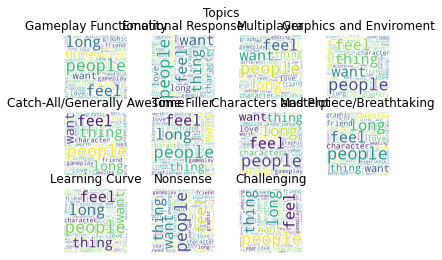

In [195]:
display_wordcloud(topic_lists, Topics, 11)

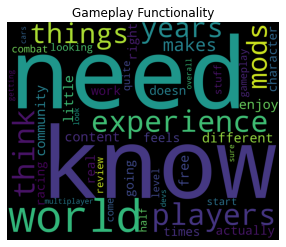

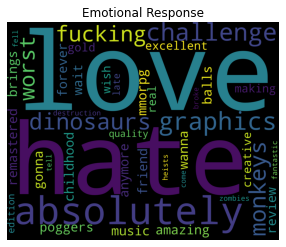

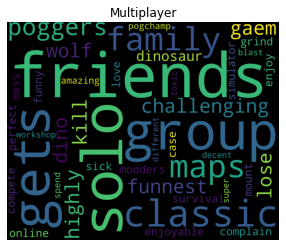

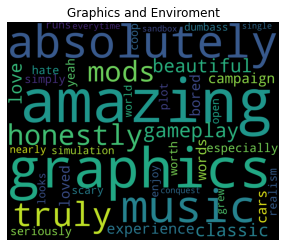

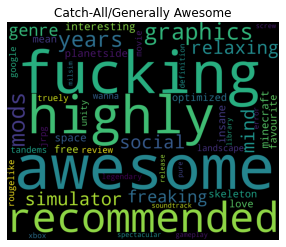

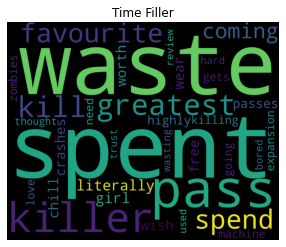

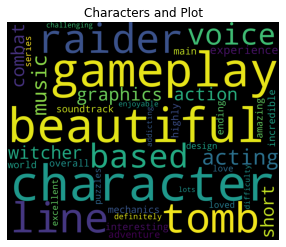

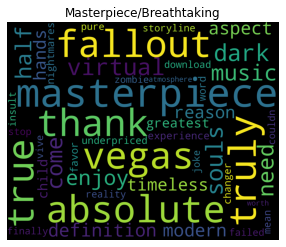

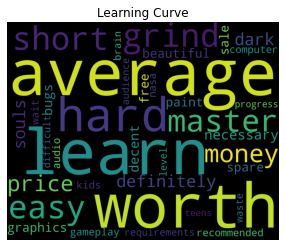

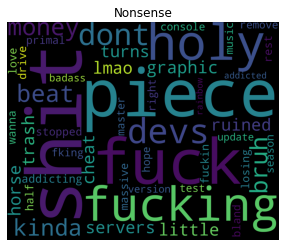

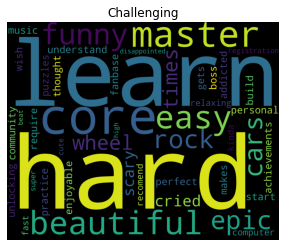

In [281]:
for i in range(model.n_components):
        plt.figure()
        plt.imshow(WordCloud(width = 2500, height = 2000,
                background_color ='black',
                stopwords = stopwords,
                relative_scaling = .1,
                prefer_horizontal = .3,
                min_font_size = 10).generate(top_lists[i]))
        plt.axis("off")
        plt.title(topics[i])
        plt.show()

In [212]:
import stylecloud


In [289]:
all_reviews_string = ' '.join(reviews_list)

In [304]:
meh = stylecloud.gen_stylecloud(text = rpg_reviews,
                          icon_name='fas fa-gamepad',
                          palette='colorbrewer.diverging.Spectral_11',
                          background_color='black',
                          stopwords = stopwords,
                          gradient='horizontal')

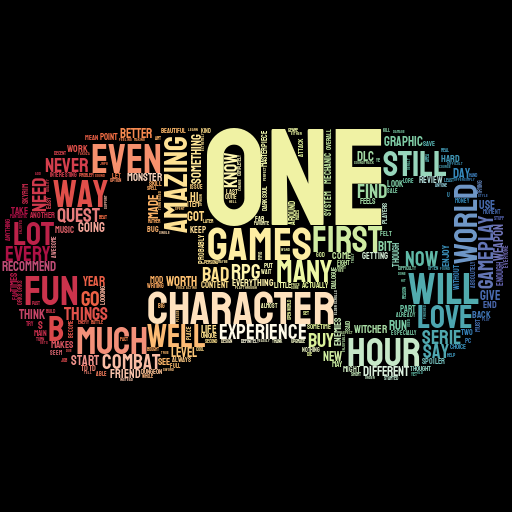

In [305]:
from IPython.display import Image
Image(filename='stylecloud.png') 

In [296]:
rpg_reviews = ' '.join(list(df[df.genre == 'RPG']['reviews']))

In [300]:
#rpg_reviews

In [301]:
action_reviews = ' '.join(list(df[df.genre == 'Action']['reviews']))

In [303]:
adventure_reviews = ' '.join(list(df[df.genre == 'Adventure']['reviews']))

In [306]:
test_query(['runescape'])

Red Dead Redemption 2
Counter-Strike: Global Offensive
House Flipper
Mount & Blade II: Bannerlord
Risk of Rain 2


In [308]:
test_query(['massively multiplayer'])

House Flipper
Euro Truck Simulator 2
The Thrill of the Fight - VR Boxing
Plants vs. Zombies GOTY Edition
Plague Inc: Evolved


In [309]:
test_query(['multiplayer magic runescape'])

Left 4 Dead 2
Holdfast: Nations At War
Tom Clancy's Rainbow Six® Siege
People Playground
The Isle


In [310]:
test_query(['free online multiplayer'])

Rec Room
Rec Room
Tom Clancy's Rainbow Six® Siege
VRChat
Counter-Strike: Global Offensive
